In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


/home/bhat/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [15]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'lines.linestyle':"--",
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [5]:
# Define the directory path where the files are located
directory_path=[]

directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_011_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_095_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_085_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_064_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_050_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')


# HEre I plot the difference in HR diagram 

1.1
0.95
0.85
0.64
0.5


Text(0.5, 0, '$m [M_\\odot]$')

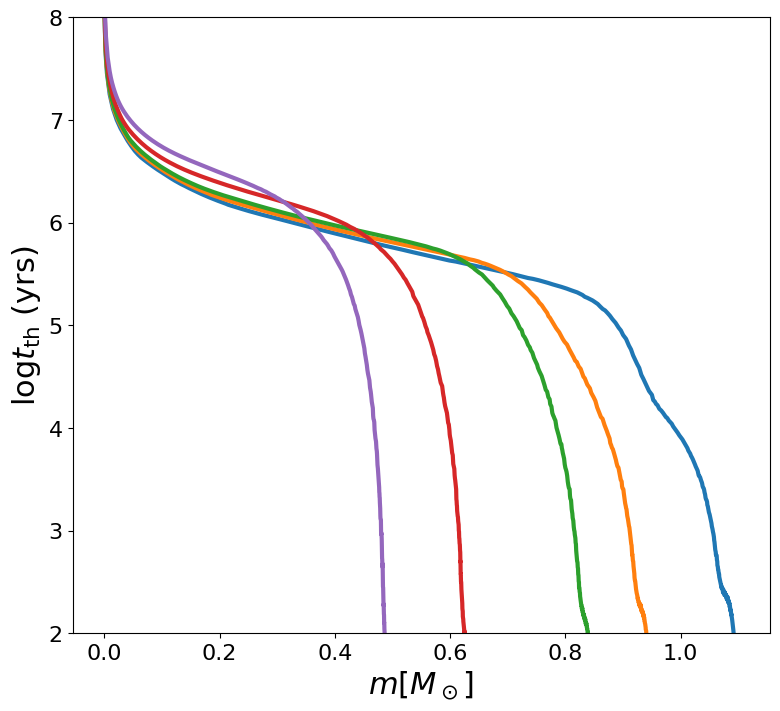

In [42]:
plt.style.use('default')

plt.rcParams["lines.linewidth"]=3
plt.rc('axes',labelsize=22)
plt.rc('legend',fontsize=18)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
i=0
fig,ax=plt.subplots(figsize=(9,8))


sigma=5.670e-5
for directory in directory_path:
    if i==0:
        h = MesaData(os.path.join(directory, 'profile4.data'))
    else:
        h = MesaData(os.path.join(directory, 'profile3.data'))
    print(h.star_mass)
    heightsquare=np.square(h.pressure_scale_height*6.96e10)
    diffusion=16*sigma*np.power(h.temperature,3)/(3*h.opacity*np.square(h.rho)*h.cp)
    plt.plot(h.q*h.star_mass,np.log10(heightsquare*3.17e-8/diffusion))
    i=i+1
    


plt.ylabel(r'$\mathrm{log}t_{\mathrm{th}}$ (yrs)')
#plt.axvline(x=0.623,color='black',linestyle='--')
#plt.xlim(0.0,0.64)

plt.ylim(2,8)
plt.xlabel(r"$m [M_\odot]$")
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.png")

In [35]:
from scipy.interpolate import interp1d

def create_interpolation_function(original_m, original_quantity):
    interpolation_function = interp1d(original_m, original_quantity, kind='linear', fill_value="extrapolate")
    return interpolation_function


Text(0.5, 0, '$m [M_\\odot]$')

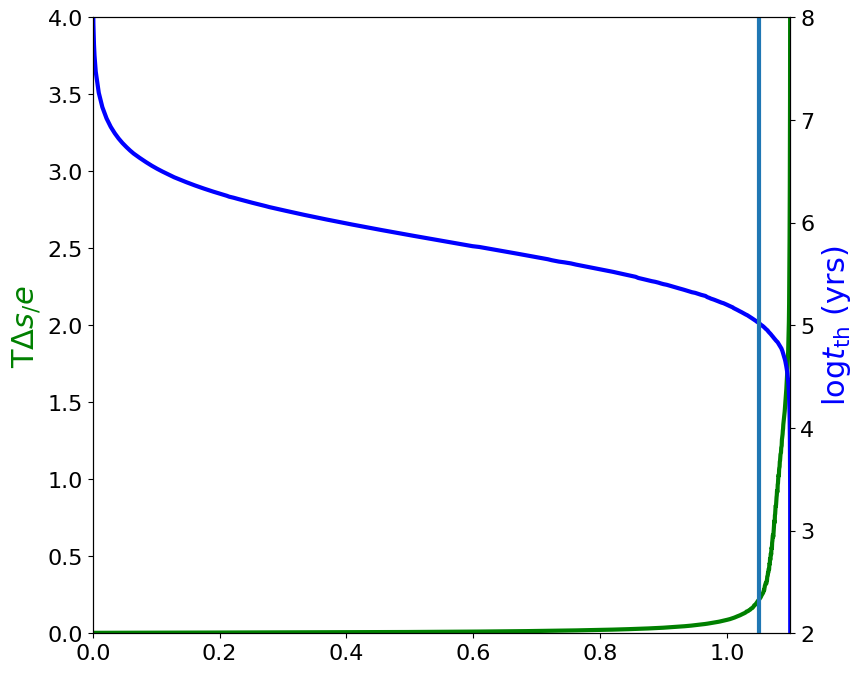

In [56]:

plt.rcParams["lines.linewidth"]=3
plt.rc('axes',labelsize=22)
plt.rc('legend',fontsize=18)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
i=0
fig,ax=plt.subplots(figsize=(9,8))


sigma=5.670e-5
for directory in directory_path:
    if i==0:
        h1 = MesaData(os.path.join(directory, 'profile4.data'))
        h2 = MesaData(os.path.join(directory, 'profile1.data'))
        new_m = np.linspace(0., 1.1, 3000)  #New mass coordinate range
        temp_wd_inital_func=create_interpolation_function(h2.q*1.1,np.power(10,h2.logT))
        entropy_initial=create_interpolation_function(h2.q*1.1,np.power(10,h2.logS))
        entropy_final=create_interpolation_function(h1.q*1.1,np.power(10,h1.logS))
        energy_initial=create_interpolation_function(h2.q*1.1,h2.energy)
        heightsquare=np.square(h2.pressure_scale_height*6.96e10)
        diffusion=16*sigma*np.power(h2.temperature,3)/(3*h2.opacity*np.square(h2.rho)*h2.cp)
        plt.plot()
        ax2=ax.twinx()
        ax.plot(new_m,((temp_wd_inital_func(new_m)*(entropy_final(new_m)-entropy_initial(new_m)))/energy_initial(new_m)),color='g')
        ax2.plot(h2.q*h2.star_mass,np.log10(heightsquare*3.17e-8/diffusion),color='b')


    #else:
    #    h = MesaData(os.path.join(directory, 'profile3.data'))
    #print(h.star_age)

    i=i+1
    


ax.set_ylabel(r'$\mathrm{T}\Delta s_/e$ ',color='g')
ax2.set_ylabel(r'$\mathrm{log}t_{\mathrm{th}}$ (yrs)',color='b')
ax2.set_ylim(2,8)
ax.set_ylim(0,4)

plt.xlim(0.0,1.1)
plt.axvline(x=1.05)
plt.xlabel(r"$m [M_\odot]$")
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.png")